In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
sns.set_style('darkgrid')
plt.rcParams['font.size']=15
plt.rcParams['figure.figsize']=(10,7)
plt.rcParams['figure.facecolor']='#FFE5B4'

In [7]:
df=pd.read_csv("World Happiness Report 2022.csv")

In [8]:
df.head(5)

,RANK,country,happiness_score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,gdp_per_capita,social_support,life_expectancy,freedom,generosity,corruption
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419


In [9]:
df_columns=['country','happiness_score','gdp_per_capita','social_support','life_expectancy','freedom','generosity','corruption']

In [12]:
df_happy=df[df_columns].copy()

In [13]:
df_happy.head()

,country,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom,generosity,corruption
0,Finland,7.821,1.892,1.258,0.775,0.736,0.109,0.534
1,Denmark,7.636,1.953,1.243,0.777,0.719,0.188,0.532
2,Iceland,7.557,1.936,1.320,0.803,0.718,0.270,0.191
3,Switzerland,7.512,2.026,1.226,0.822,0.677,0.147,0.461
4,Netherlands,7.415,1.945,1.206,0.787,0.651,0.271,0.419


In [14]:
df_happy.isnull().sum()

country            0
happiness_score    0
gdp_per_capita     0
social_support     0
life_expectancy    0
freedom            0
generosity         0
corruption         0
dtype: int64

Text(0, 0.5, 'gdp per capita')

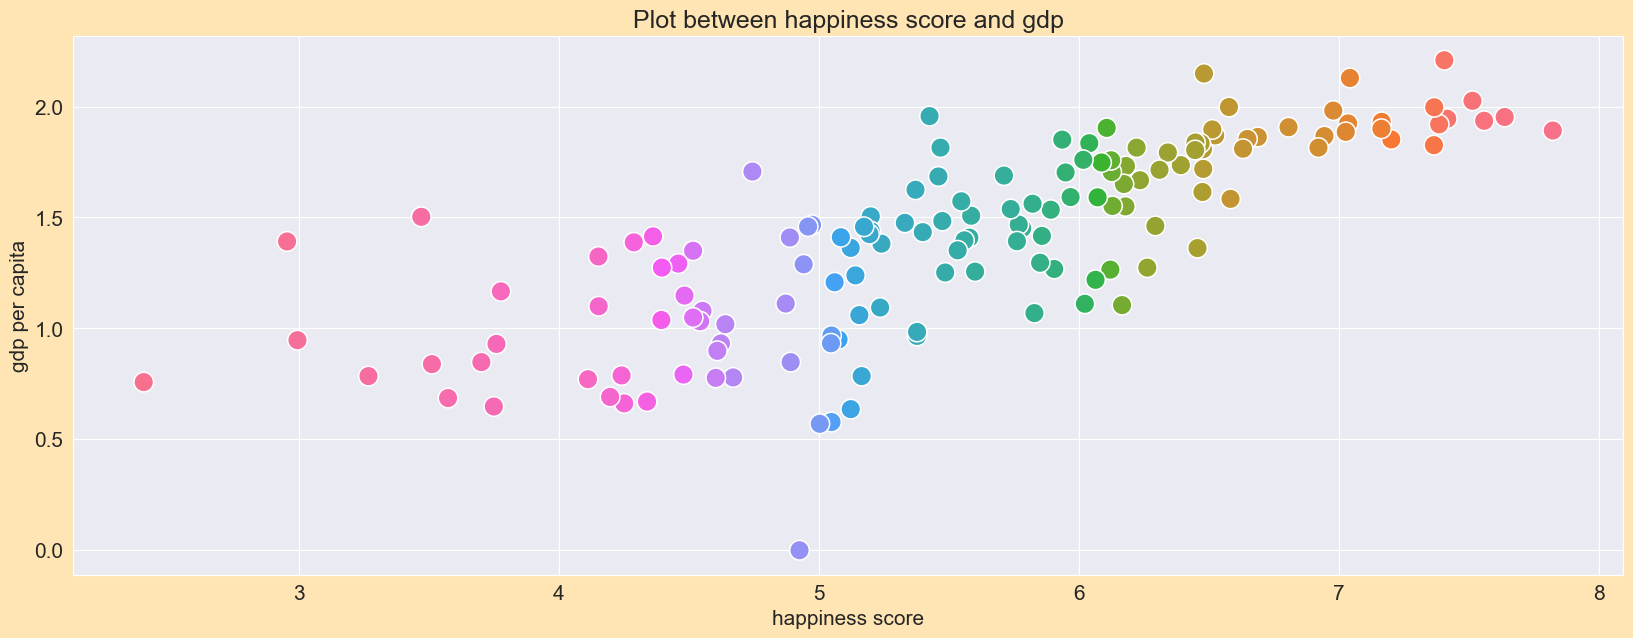

In [24]:
#plot between happiness and gdp by country
plt.rcParams['figure.figsize']=(20,7)
plt.title("Plot between happiness score and gdp")
sns.scatterplot(x=df_happy.happiness_score, y=df_happy.gdp_per_capita,hue=df_happy.country,s=200,legend=False)
#plt.legend(loc='upper left',fontsize='10')
plt.xlabel('happiness score')
plt.ylabel('gdp per capita')

C:\Users\prate\AppData\Local\Temp\ipykernel_14896\2705964952.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(cor,mask=np.zeros_like(cor,dtype=np.bool),cmap='Blues',square=True,ax=ax)


<AxesSubplot:>

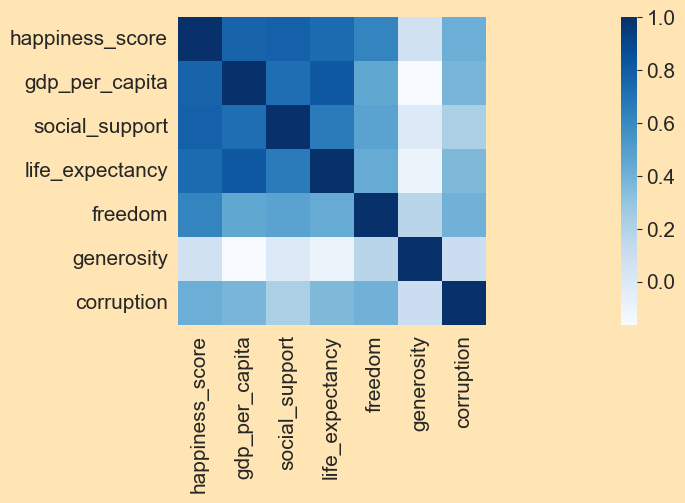

In [31]:
#correlation map
cor=df_happy.corr(method='pearson')
f,ax=plt.subplots(figsize=(35,4))
sns.heatmap(cor,mask=np.zeros_like(cor,dtype=np.bool),cmap='Blues',square=True,ax=ax)


In [32]:
top_10=df_happy.head(10)
bottom_10=df_happy.tail(10)

C:\Users\prate\AppData\Local\Temp\ipykernel_14896\2133590973.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(xlabels,rotation=45,ha='right')
C:\Users\prate\AppData\Local\Temp\ipykernel_14896\2133590973.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_yticklabels(xlabels,rotation=45,ha='right')


Text(1598.90404040404, 0.5, 'life_expectancy')

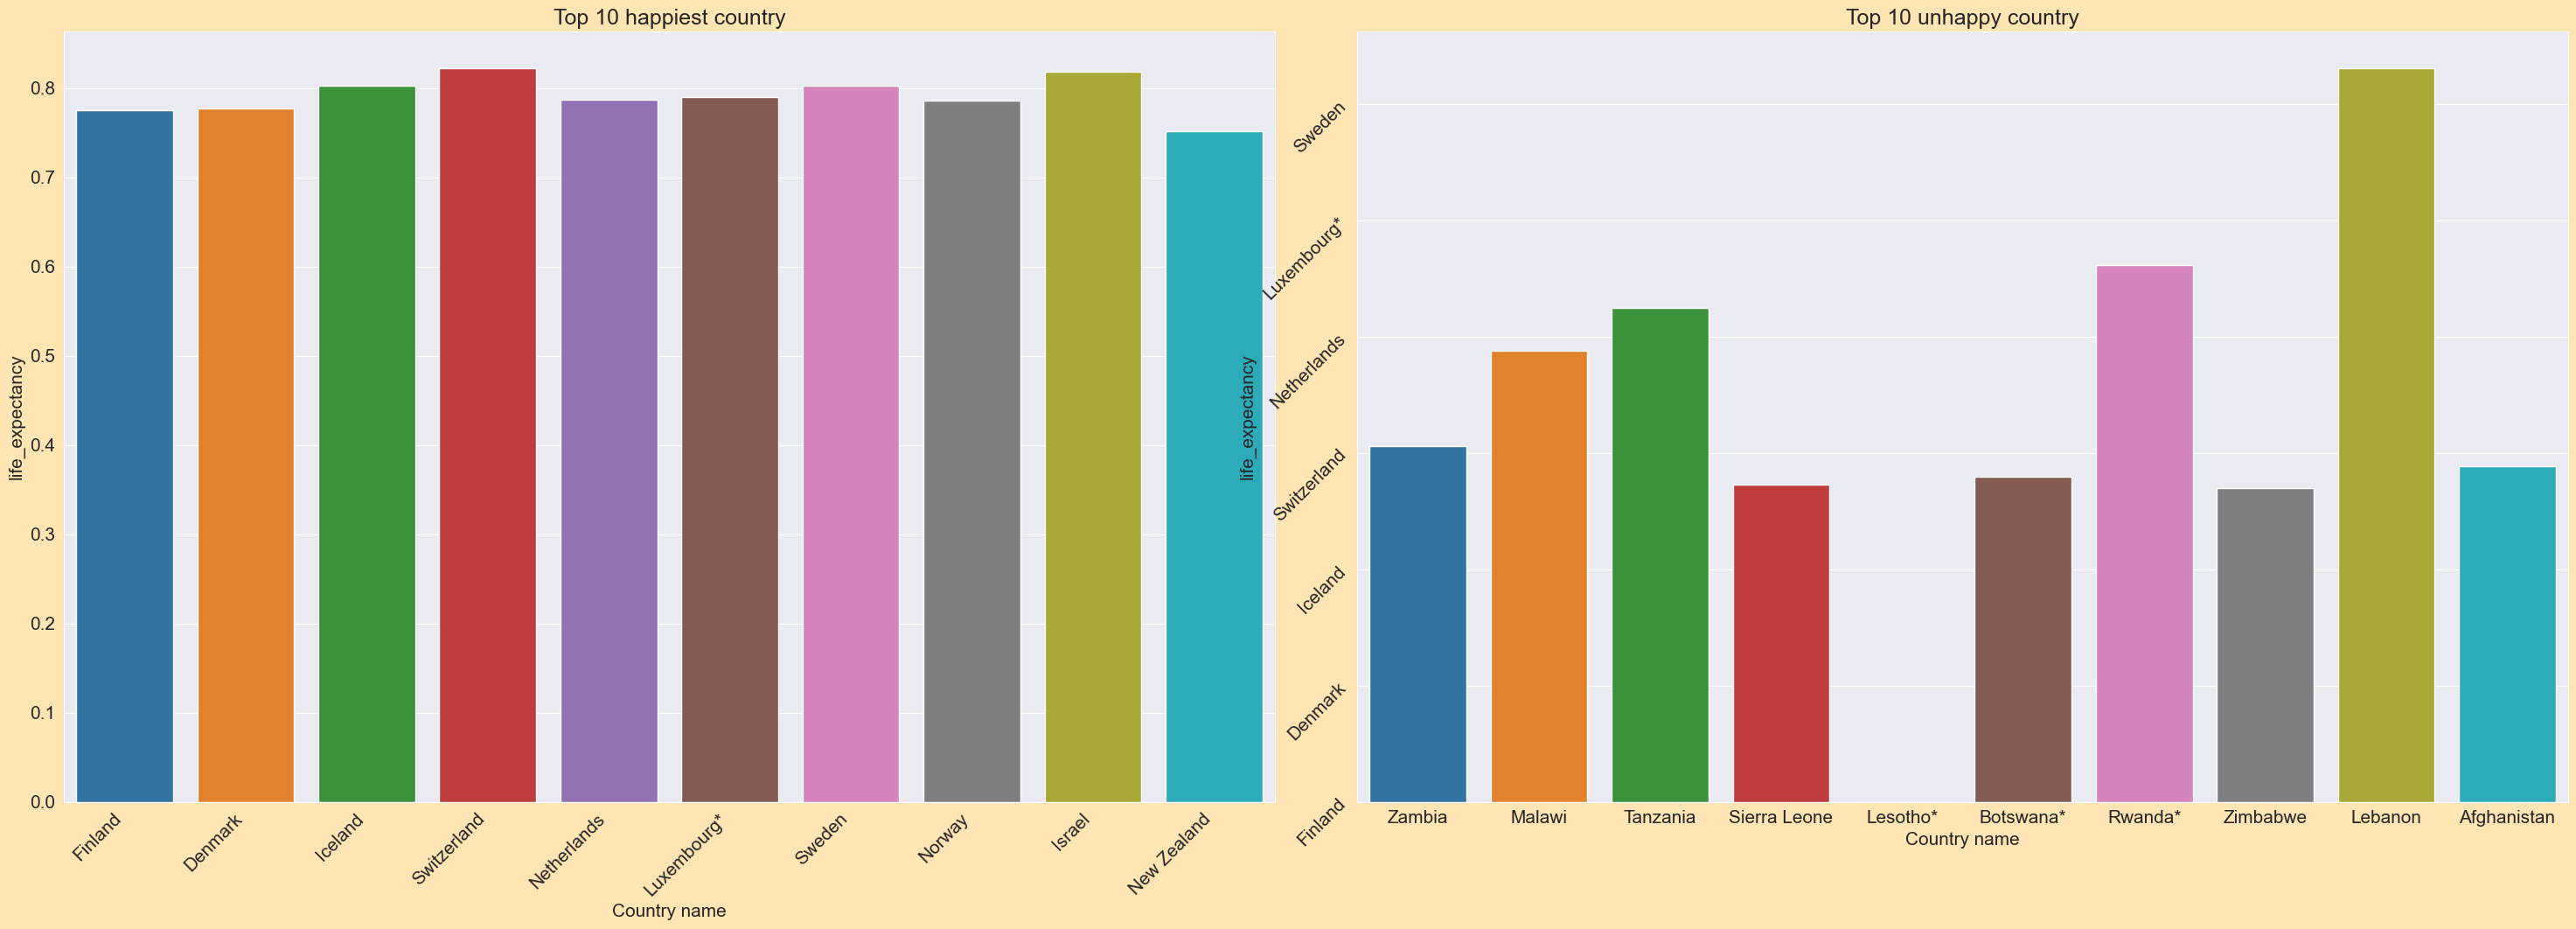

In [41]:
fig,axes=plt.subplots(1,2,figsize=(30,10))
plt.tight_layout(pad=2)

xlabels=top_10.country
axes[0].set_title('Top 10 happiest country')
axes[0].set_xticklabels(xlabels,rotation=45,ha='right')
sns.barplot(x=top_10.country,y=top_10.life_expectancy,ax=axes[0])
axes[0].set_xlabel('Country name')
axes[0].set_ylabel('life_expectancy')

ylabels=bottom_10.country
axes[1].set_title('Top 10 unhappy country')
axes[1].set_yticklabels(xlabels,rotation=45,ha='right')
sns.barplot(x=bottom_10.country,y=bottom_10.life_expectancy,ax=axes[1])
axes[1].set_xlabel('Country name')
axes[1].set_ylabel('life_expectancy')


Text(0, 0.5, 'happiness score')

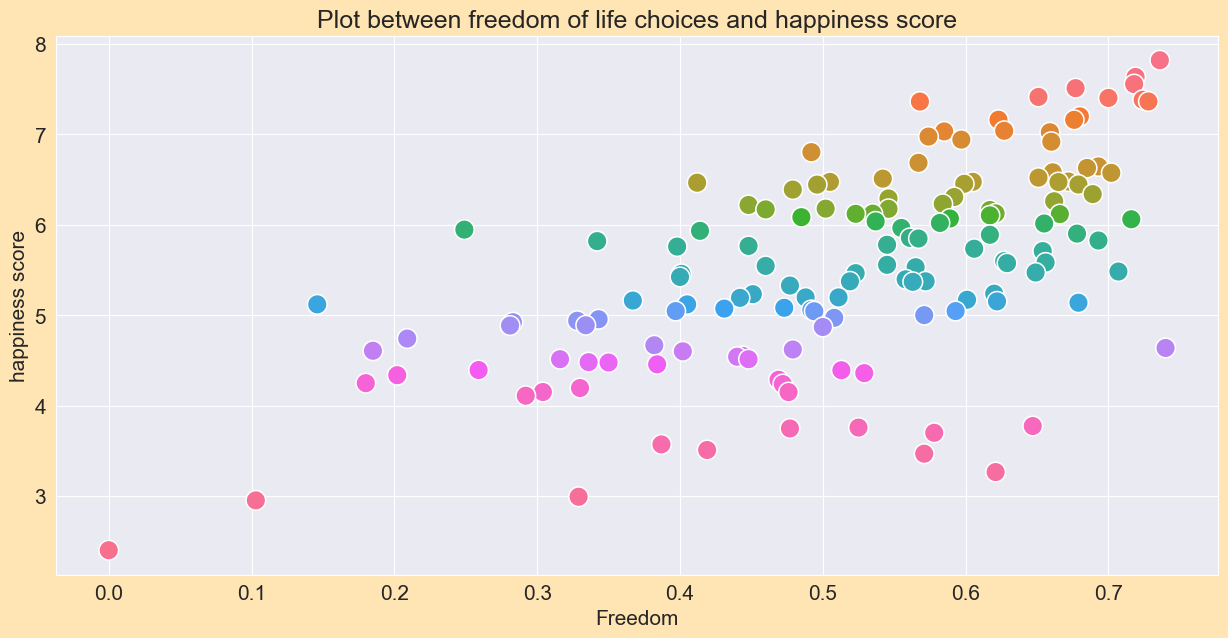

In [46]:
#plot b/w freedom and happiness score
plt.rcParams['figure.figsize']=(15,7)
plt.title("Plot between freedom of life choices and happiness score")
sns.scatterplot(x=df_happy.freedom,y=df_happy.happiness_score,s=200,hue=df_happy.country,legend=False)
plt.xlabel('Freedom')
plt.ylabel('happiness score')


<BarContainer object of 10 artists>

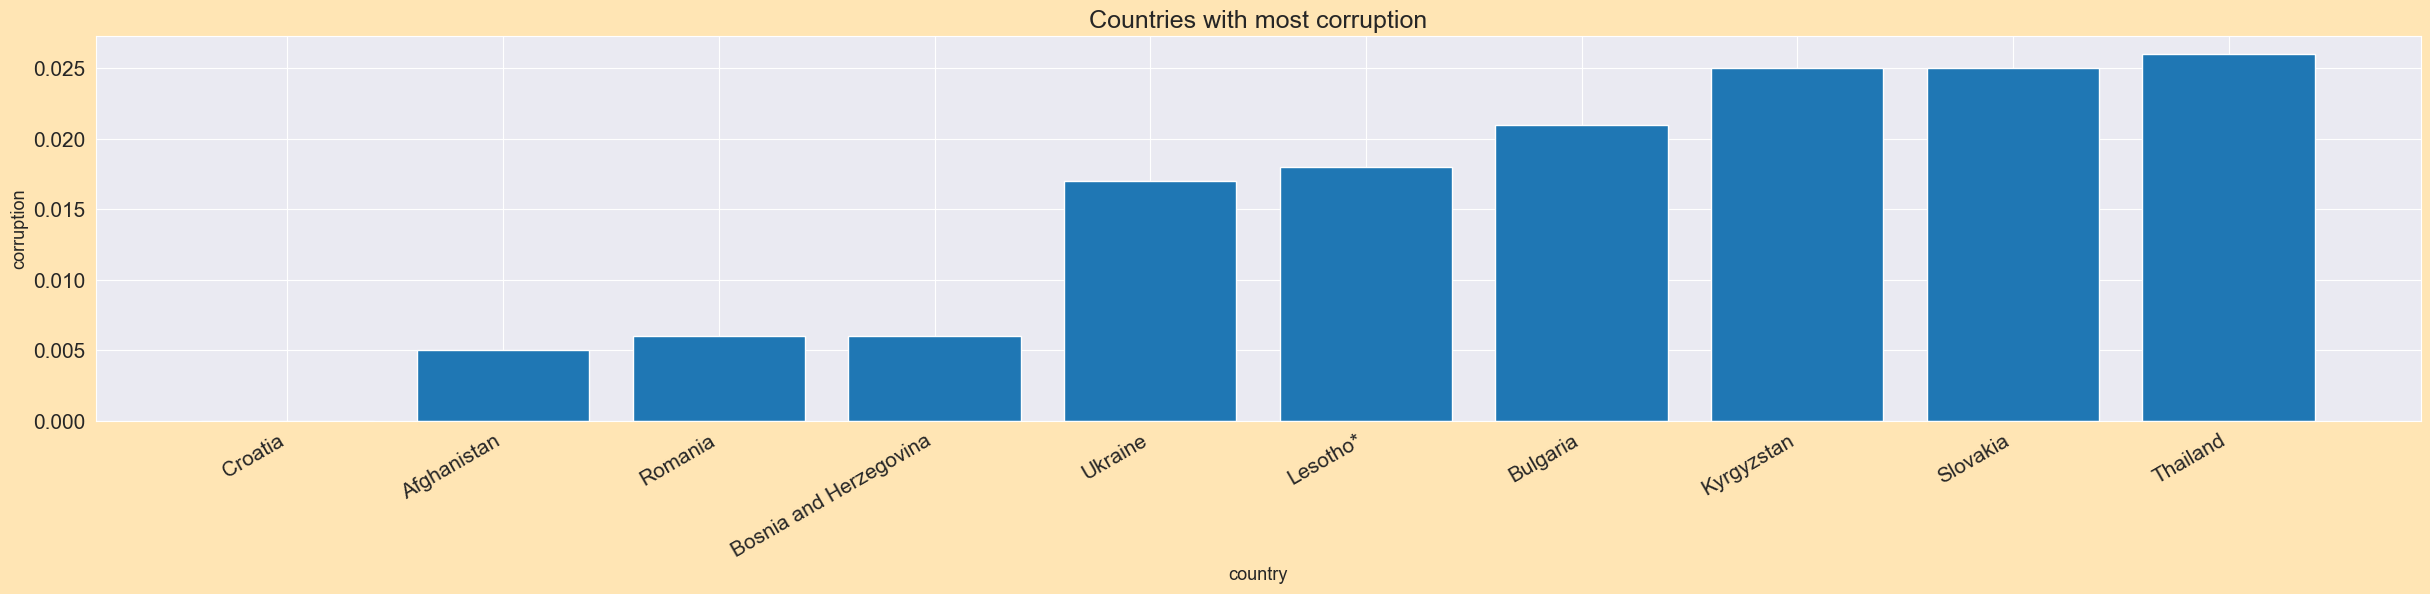

In [47]:
#top 10 most corrupt country
Country=df_happy.sort_values(by='corruption').head(10)
plt.rcParams['figure.figsize']=(30,5)
plt.title('Countries with most corruption')
plt.xlabel('country',fontsize=13)
plt.ylabel('corruption',fontsize=13)
plt.xticks(rotation=30,ha='right')
plt.bar(Country.country,Country.corruption)

<BarContainer object of 10 artists>

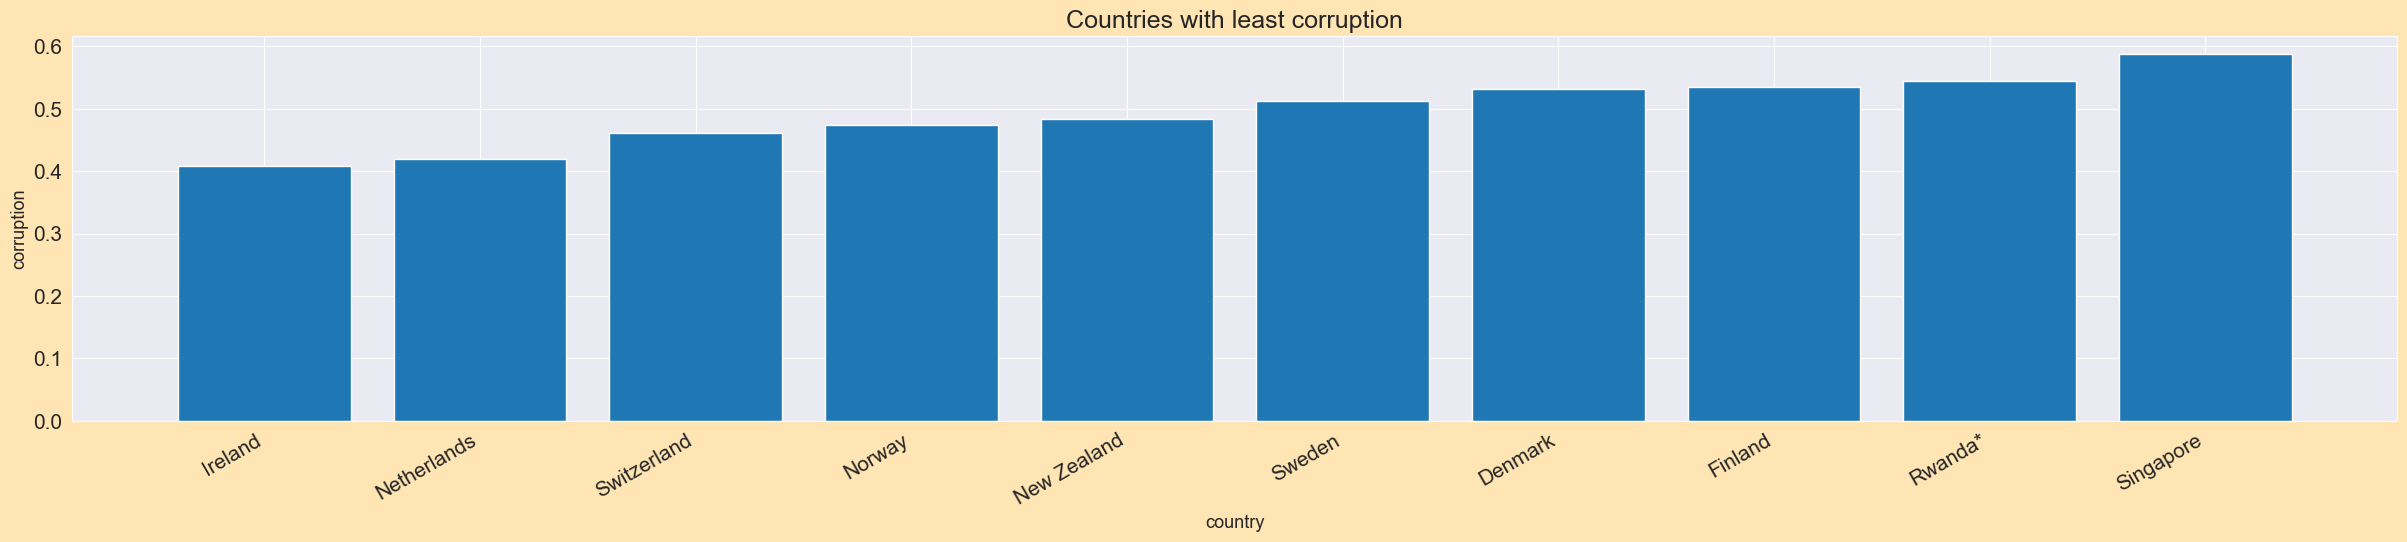

In [49]:
Country=df_happy.sort_values(by='corruption').tail(10)
plt.rcParams['figure.figsize']=(30,5)
plt.title('Countries with least corruption')
plt.xlabel('country',fontsize=13)
plt.ylabel('corruption',fontsize=13)
plt.xticks(rotation=30,ha='right')
plt.bar(Country.country,Country.corruption)

Text(0, 0.5, 'corruption')

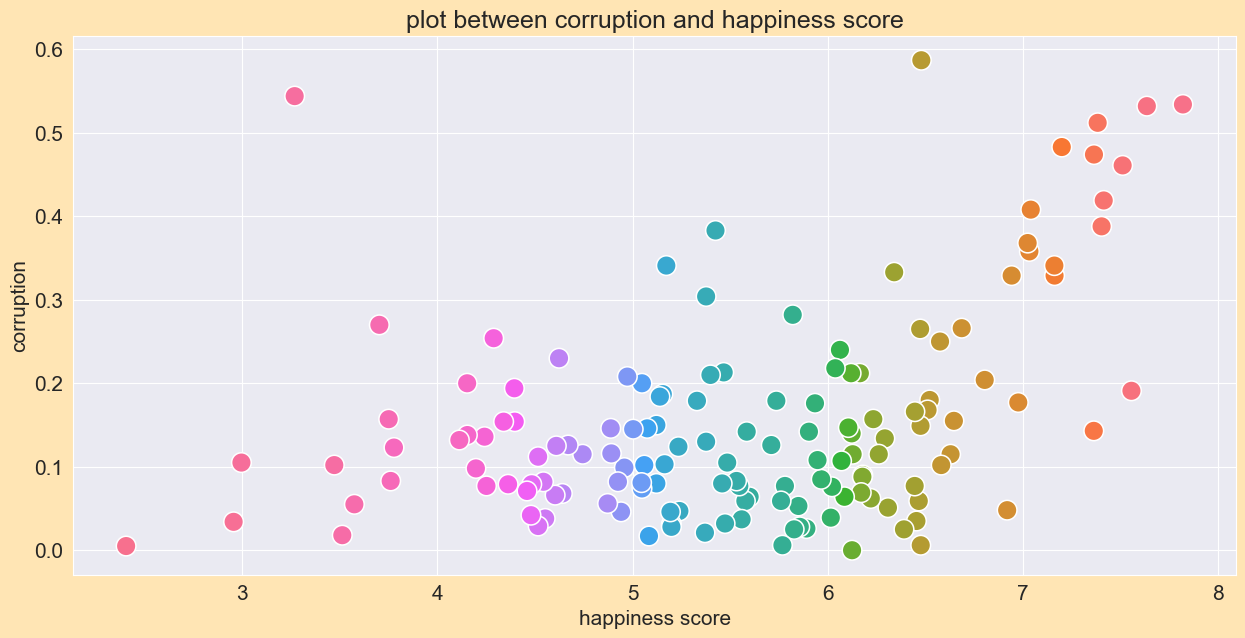

In [52]:
#corruption vs happiness score
plt.rcParams['figure.figsize']=(15,7)
plt.title('plot between corruption and happiness score')
sns.scatterplot(x=df_happy.happiness_score,y=df_happy.corruption,hue=df_happy.country,s=200,legend=False)
plt.xlabel('happiness score')
plt.ylabel('corruption')